# Marketing Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import folium 
import folium.plugins
import branca
import branca.colormap as cm
import geopandas as gpd
from folium.features import GeoJsonTooltip
from scipy.stats import ttest_ind

## PROBELM TO SOLVE: what the actual effect of a client's advertising is

## Data

In [2]:
df = pd.read_csv('did_data.csv')
df.head()

,dma_code,dma_description,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,west,midwest,northeast,south,date,post,impressions,volume
0,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,0,0,1,0,2022-03-01,0,2121,2
1,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,0,0,1,0,2022-03-02,0,1924,1
2,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,0,0,1,0,2022-03-03,0,2172,2
3,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,0,0,1,0,2022-03-04,0,1715,1
4,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,0,0,1,0,2022-03-05,0,1460,1


In [3]:
df.describe()

,dma_code,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,west,midwest,northeast,south,post,impressions,volume
count,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000,38850.000000
mean,641.104762,0.238095,59882.066963,82.726718,39.293223,13.147077,10.779309,2.517133,24.853741,0.223810,0.276190,0.100000,0.400000,0.502703,1999.726667,2.078378
std,100.137094,0.425923,11669.572334,4.541061,3.241758,16.334426,11.477498,0.517520,1.206113,0.416801,0.447118,0.300004,0.489904,0.499999,300.736380,0.573788
min,500.000000,0.000000,34185.145334,63.609899,29.386987,1.095724,0.296758,1.368105,19.796657,0.000000,0.000000,0.000000,0.000000,0.000000,738.000000,0.000000
25%,552.000000,0.000000,51907.319149,80.150110,37.416546,4.010291,2.475177,2.196718,24.192534,0.000000,0.000000,0.000000,0.000000,0.000000,1796.000000,2.000000
50%,627.500000,0.000000,57484.451119,83.179315,39.060763,6.833150,6.170795,2.497861,24.944375,0.000000,0.000000,0.000000,0.000000,1.000000,1999.000000,2.000000
75%,724.000000,0.000000,65224.179743,85.842888,41.041602,14.209221,15.714911,2.801753,25.523872,0.000000,1.000000,0.000000,1.000000,1.000000,2204.000000,2.000000
max,881.000000,1.000000,115924.957523,91.776122,54.393646,95.518811,63.193150,4.492512,29.272561,1.000000,1.000000,1.000000,1.000000,1.000000,3175.000000,5.000000


In [4]:
df.isnull().sum()

dma_code                     0
dma_description              0
treat                        0
medincome_dma                0
percent_with_internet_dma    0
age_dma                      0
percent_hispanic_dma         0
percent_black_dma            0
percent_unemployed_dma       0
percent_inpov_dma            0
west                         0
midwest                      0
northeast                    0
south                        0
date                         0
post                         0
impressions                  0
volume                       0
dtype: int64

**Treated group**

In [5]:
df[df.treat == 1].describe()

,dma_code,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,west,midwest,northeast,south,post,impressions,volume
count,9250.000000,9250.0,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000
mean,640.020000,1.0,60328.638201,82.918252,39.638037,11.661886,10.376407,2.474878,24.941288,0.200000,0.280000,0.140000,0.380000,0.502703,1997.616973,2.327784
std,98.309432,0.0,11915.509042,4.256556,2.511071,12.689365,10.392214,0.510530,1.104997,0.400022,0.449023,0.347006,0.485413,0.500020,302.533487,0.673885
min,502.000000,1.0,39675.168130,71.298827,34.226482,1.547154,0.427694,1.368105,21.747377,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000,1.000000
25%,561.000000,1.0,52764.628673,80.275135,37.763644,4.258258,3.190506,2.196718,24.158957,0.000000,0.000000,0.000000,0.000000,0.000000,1789.000000,2.000000
50%,616.500000,1.0,58654.572811,83.847655,39.396642,7.305958,5.943231,2.470561,25.084651,0.000000,0.000000,0.000000,0.000000,1.000000,1999.000000,2.000000
75%,722.000000,1.0,65018.290204,85.973271,41.136549,10.743525,15.008329,2.693402,25.622270,0.000000,1.000000,0.000000,1.000000,1.000000,2204.000000,3.000000
max,868.000000,1.0,115924.957523,91.776122,46.165145,63.470365,42.109613,4.247351,27.324596,1.000000,1.000000,1.000000,1.000000,1.000000,2996.000000,5.000000


**Control group**

In [6]:
df[df.treat == 0].describe()

,dma_code,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,west,midwest,northeast,south,post,impressions,volume
count,29600.00000,29600.0,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000
mean,641.44375,0.0,59742.513451,82.666863,39.185468,13.611199,10.905216,2.530338,24.826383,0.231250,0.275000,0.087500,0.406250,0.502703,2000.385946,2.000439
std,100.70068,0.0,11588.322519,4.624824,3.431339,17.290915,11.793533,0.518989,1.234762,0.421639,0.446522,0.282571,0.491141,0.500001,300.174668,0.514495
min,500.00000,0.0,34185.145334,63.609899,29.386987,1.095724,0.296758,1.370822,19.796657,0.000000,0.000000,0.000000,0.000000,0.000000,738.000000,0.000000
25%,550.75000,0.0,51659.462813,80.140924,37.345834,3.830017,2.444941,2.203976,24.277159,0.000000,0.000000,0.000000,0.000000,0.000000,1797.750000,2.000000
50%,630.50000,0.0,57388.491916,83.082181,38.968219,6.685482,6.250050,2.528604,24.898109,0.000000,0.000000,0.000000,0.000000,1.000000,1999.000000,2.000000
75%,724.25000,0.0,65682.344419,85.739104,40.961855,14.584260,15.848857,2.832597,25.462514,0.000000,1.000000,0.000000,1.000000,1.000000,2203.000000,2.000000
max,881.00000,0.0,106112.740023,91.652816,54.393646,95.518811,63.193150,4.492512,29.272561,1.000000,1.000000,1.000000,1.000000,1.000000,3175.000000,4.000000


**T-test**

In [7]:
columns = ['medincome_dma', 'percent_with_internet_dma', 'age_dma', 'percent_hispanic_dma', 'percent_black_dma', 'percent_unemployed_dma', 'percent_inpov_dma', 'west', 'midwest', 'northeast', 'south', ]

In [8]:
treatment = df[df.treat == 1]
control = df[df.treat == 0]

for i in columns:    
    print(i,':',ttest_ind(treatment[i], control[i]))

medincome_dma : Ttest_indResult(statistic=4.2174519323177915, pvalue=2.4763745371092684e-05)
percent_with_internet_dma : Ttest_indResult(statistic=4.648627118188193, pvalue=3.3524862386000787e-06)
age_dma : Ttest_indResult(statistic=11.7405472675842, pvalue=8.937699455311858e-32)
percent_hispanic_dma : Ttest_indResult(statistic=-10.031251941022356, pvalue=1.1871876897167879e-23)
percent_black_dma : Ttest_indResult(statistic=-3.8685710448766986, pvalue=0.00010965356868460092)
percent_unemployed_dma : Ttest_indResult(statistic=-9.00580933290245, pvalue=2.235563189700673e-19)
percent_inpov_dma : Ttest_indResult(statistic=8.004337710391107, pvalue=1.2342389784912178e-15)
west : Ttest_indResult(statistic=-6.297354920768708, pvalue=3.059995612365047e-10)
midwest : Ttest_indResult(statistic=0.9387900238411319, pvalue=0.34784439857006977)
northeast : Ttest_indResult(statistic=14.731867938618446, pvalue=5.4581486234721096e-49)
south : Ttest_indResult(statistic=-4.499319617373373, pvalue=6.83687

The tests for all the variables (but *midwest*) suggest that $H_{0}$ can be rejected, therefore, the treatment creates some effects.

## Map

In [9]:
cities = [
{'city': 'Ada', 'dma_code': 657, 'latitude': 34.774531000000003, 'longitude': -96.678344899999999, 'region': 'OK', 'slug': 'ada-ok'},
{'city': 'Akron', 'dma_code': 510, 'latitude': 41.081444699999999, 'longitude': -81.519005300000003, 'region': 'OH', 'slug': 'akron-oh'},
{'city': 'Albany', 'dma_code': 525, 'latitude': 31.578507399999999, 'longitude': -84.155741000000006, 'region': 'GA', 'slug': 'albany-ga'},
{'city': 'Alexandria', 'dma_code': 644, 'latitude': 31.311293599999999, 'longitude': -92.445137099999997, 'region': 'LA', 'slug': 'alexandria-la'},
{'city': 'Alpena', 'dma_code': 583, 'latitude': 45.061679400000003, 'longitude': -83.432752800000003, 'region': 'MI', 'slug': 'alpena-mi'},
{'city': 'Altoona', 'dma_code': 574, 'latitude': 40.5186809, 'longitude': -78.394735900000001, 'region': 'PA', 'slug': 'altoona-pa'},
{'city': 'Amarillo', 'dma_code': 634, 'latitude': 35.221997100000003, 'longitude': -101.8312969, 'region': 'TX', 'slug': 'amarillo-tx'},
{'city': 'Ames', 'dma_code': 679, 'latitude': 42.023350000000001, 'longitude': -93.625622000000007, 'region': 'IA', 'slug': 'ames-ia'},
{'city': 'Anchorage', 'dma_code': 743, 'latitude': 61.2180556, 'longitude': -149.9002778, 'region': 'AK', 'slug': 'anchorage-ak'},
{'city': 'Anderson', 'dma_code': 567, 'latitude': 34.503439399999998, 'longitude': -82.650133199999999, 'region': 'SC', 'slug': 'anderson-sc'},
{'city': 'Appleton', 'dma_code': 658, 'latitude': 44.261930900000003, 'longitude': -88.415384700000004, 'region': 'WI', 'slug': 'appleton-wi'},
{'city': 'Atlanta', 'dma_code': 524, 'latitude': 33.748995399999998, 'longitude': -84.387982399999999, 'region': 'GA', 'slug': 'atlanta-ga'},
{'city': 'Auburn', 'dma_code': 500, 'latitude': 44.097850899999997, 'longitude': -70.231165500000003, 'region': 'ME', 'slug': 'auburn-me'},
{'city': 'Augusta', 'dma_code': 520, 'latitude': 33.469999999999999, 'longitude': -81.974999999999994, 'region': 'GA', 'slug': 'augusta-ga'},
{'city': 'Austin', 'dma_code': 611, 'latitude': 43.6666296, 'longitude': -92.974636700000005, 'region': 'MN', 'slug': 'austin-mn'},
{'city': 'Austin', 'dma_code': 635, 'latitude': 30.267153, 'longitude': -97.743060799999995, 'region': 'TX', 'slug': 'austin-tx'},
{'city': 'Bakersfield', 'dma_code': 800, 'latitude': 35.3732921, 'longitude': -119.01871250000001, 'region': 'CA', 'slug': 'bakersfield-ca'},
{'city': 'Baltimore', 'dma_code': 512, 'latitude': 39.290384799999998, 'longitude': -76.612189299999997, 'region': 'MD', 'slug': 'baltimore-md'},
{'city': 'Bangor', 'dma_code': 537, 'latitude': 44.801182099999998, 'longitude': -68.777813800000004, 'region': 'ME', 'slug': 'bangor-me'},
{'city': 'Baton Rouge', 'dma_code': 716, 'latitude': 30.450746200000001, 'longitude': -91.154550999999998, 'region': 'LA', 'slug': 'baton-rouge-la'},
{'city': 'Battle Creek', 'dma_code': 563, 'latitude': 42.3211522, 'longitude': -85.179714200000006, 'region': 'MI', 'slug': 'battle-creek-mi'},
{'city': 'Bay City', 'dma_code': 513, 'latitude': 43.594467700000003, 'longitude': -83.888864699999999, 'region': 'MI', 'slug': 'bay-city-mi'},
{'city': 'Bend', 'dma_code': 821, 'latitude': 44.058172800000001, 'longitude': -121.31530960000001, 'region': 'OR', 'slug': 'bend-or'},
{'city': 'Billings', 'dma_code': 756, 'latitude': 45.783285599999999, 'longitude': -108.5006904, 'region': 'MT', 'slug': 'billings-mt'},
{'city': 'Binghamton', 'dma_code': 502, 'latitude': 42.098686700000002, 'longitude': -75.917973799999999, 'region': 'NY', 'slug': 'binghamton-ny'},
{'city': 'Birmingham', 'dma_code': 630, 'latitude': 33.520660800000002, 'longitude': -86.802490000000006, 'region': 'AL', 'slug': 'birmingham-al'},
{'city': 'Bloomington', 'dma_code': 675, 'latitude': 40.484202699999997, 'longitude': -88.993687300000005, 'region': 'IL', 'slug': 'bloomington-il'},
{'city': 'Boise', 'dma_code': 757, 'latitude': 43.613739000000002, 'longitude': -116.237651, 'region': 'ID', 'slug': 'boise-id'},
{'city': 'Bowling Green', 'dma_code': 736, 'latitude': 36.990319900000003, 'longitude': -86.443601799999996, 'region': 'KY', 'slug': 'bowling-green-ky'},
{'city': 'Bozeman', 'dma_code': 754, 'latitude': 45.683459999999997, 'longitude': -111.050499, 'region': 'MT', 'slug': 'bozeman-mt'},
{'city': 'Bryan', 'dma_code': 625, 'latitude': 30.674364300000001, 'longitude': -96.369963200000001, 'region': 'TX', 'slug': 'bryan-tx'},
{'city': 'Buffalo', 'dma_code': 514, 'latitude': 42.886446800000002, 'longitude': -78.878368899999998, 'region': 'NY', 'slug': 'buffalo-ny'},
{'city': 'Cadillac', 'dma_code': 540, 'latitude': 44.251952600000003, 'longitude': -85.401161900000005, 'region': 'MI', 'slug': 'cadillac-mi'},
{'city': 'Canton', 'dma_code': 510, 'latitude': 40.798947300000002, 'longitude': -81.378446999999994, 'region': 'OH', 'slug': 'canton-oh'},
{'city': 'Champaign', 'dma_code': 648, 'latitude': 39.8403147, 'longitude': -88.9548001, 'region': 'IL', 'slug': 'champaign-il'},
{'city': 'Charleston', 'dma_code': 519, 'latitude': 32.776565599999998, 'longitude': -79.930921600000005, 'region': 'SC', 'slug': 'charleston-sc'},
{'city': 'Charlotte', 'dma_code': 517, 'latitude': 35.227086900000003, 'longitude': -80.843126699999999, 'region': 'NC', 'slug': 'charlotte-nc'},
{'city': 'Charlottesville', 'dma_code': 584, 'latitude': 38.029305899999997, 'longitude': -78.476678100000001, 'region': 'VA', 'slug': 'charlottesville-va'},
{'city': 'Chattanooga', 'dma_code': 575, 'latitude': 35.045629699999999, 'longitude': -85.309680099999994, 'region': 'TN', 'slug': 'chattanooga-tn'},
{'city': 'Chicago', 'dma_code': 602, 'latitude': 41.850033000000003, 'longitude': -87.650052299999999, 'region': 'IL', 'slug': 'chicago-il'},
{'city': 'Cincinnati', 'dma_code': 515, 'latitude': 39.136111100000001, 'longitude': -84.503055599999996, 'region': 'OH', 'slug': 'cincinnati-oh'},
{'city': 'Cities', 'dma_code': 531, 'latitude': 36.472723000000002, 'longitude': -82.410686200000001, 'region': 'TN-VA', 'slug': 'cities-tn-va'},
{'city': 'Columbia', 'dma_code': 546, 'latitude': 34.000710400000003, 'longitude': -81.034814400000002, 'region': 'SC', 'slug': 'columbia-sc'},
{'city': 'Columbus', 'dma_code': 522, 'latitude': 32.4609764, 'longitude': -84.9877094, 'region': 'GA', 'slug': 'columbus-ga'},
{'city': 'Columbus', 'dma_code': 535, 'latitude': 39.961175500000003, 'longitude': -82.998794200000006, 'region': 'OH', 'slug': 'columbus-oh'},
{'city': 'Corpus Christi', 'dma_code': 600, 'latitude': 27.800582800000001, 'longitude': -97.396381000000005, 'region': 'TX', 'slug': 'corpus-christi-tx'},
{'city': 'Dayton', 'dma_code': 542, 'latitude': 39.758947800000001, 'longitude': -84.191606899999996, 'region': 'OH', 'slug': 'dayton-oh'},
{'city': 'Decatur', 'dma_code': 691, 'latitude': 34.605925300000003, 'longitude': -86.983341699999997, 'region': 'AL', 'slug': 'decatur-al'},
{'city': 'Decatur;', 'dma_code': 648, 'latitude': 39.8403147, 'longitude': -88.9548001, 'region': 'IL', 'slug': 'decatur-il'},
{'city': 'Denver', 'dma_code': 751, 'latitude': 39.739153600000002, 'longitude': -104.9847034, 'region': 'CO', 'slug': 'denver-co'},
{'city': 'Detroit', 'dma_code': 505, 'latitude': 42.331426999999998, 'longitude': -83.0457538, 'region': 'MI', 'slug': 'detroit-mi'},
{'city': 'Dickinson', 'dma_code': 687, 'latitude': 46.879175600000003, 'longitude': -102.78962420000001, 'region': 'ND', 'slug': 'dickinson-nd'},
{'city': 'Dothan', 'dma_code': 606, 'latitude': 31.223231299999998, 'longitude': -85.3904888, 'region': 'AL', 'slug': 'dothan-al'},
{'city': 'Durham', 'dma_code': 560, 'latitude': 35.994032900000001, 'longitude': -78.898618999999997, 'region': 'NC', 'slug': 'durham-nc'},
{'city': 'Eau Claire', 'dma_code': 702, 'latitude': 44.811349, 'longitude': -91.498494100000002, 'region': 'WI', 'slug': 'eau-claire-wi'},
{'city': 'El Centro', 'dma_code': 771, 'latitude': 32.792000000000002, 'longitude': -115.56305140000001, 'region': 'CA', 'slug': 'el-centro-ca'},
{'city': 'El Dorado', 'dma_code': 628, 'latitude': 33.210973, 'longitude': -92.665901, 'region': 'AR', 'slug': 'el-dorado-ar'},
{'city': 'El Paso', 'dma_code': 765, 'latitude': 31.758719800000001, 'longitude': -106.4869314, 'region': 'TX', 'slug': 'el-paso-tx'},
{'city': 'Elkhart', 'dma_code': 588, 'latitude': 41.681993499999997, 'longitude': -85.9766671, 'region': 'IN', 'slug': 'elkhart-in'},
{'city': 'Elmira', 'dma_code': 565, 'latitude': 42.089796499999999, 'longitude': -76.807733799999994, 'region': 'NY', 'slug': 'elmira-ny'},
{'city': 'Erie', 'dma_code': 516, 'latitude': 42.129224100000002, 'longitude': -80.085059000000001, 'region': 'PA', 'slug': 'erie-pa'},
{'city': 'Eugene', 'dma_code': 801, 'latitude': 44.052069099999997, 'longitude': -123.08675359999999, 'region': 'OR', 'slug': 'eugene-or'},
{'city': 'Eureka', 'dma_code': 802, 'latitude': 40.8020712, 'longitude': -124.16367289999999, 'region': 'CA', 'slug': 'eureka-ca'},
{'city': 'Evansville', 'dma_code': 649, 'latitude': 37.974764399999998, 'longitude': -87.5558482, 'region': 'IN', 'slug': 'evansville-in'},
{'city': 'Fairbanks', 'dma_code': 745, 'latitude': 64.837777799999998, 'longitude': -147.7163889, 'region': 'AK', 'slug': 'fairbanks-ak'},
{'city': 'Fayetteville', 'dma_code': 560, 'latitude': 35.052664100000001, 'longitude': -78.878358500000004, 'region': 'NC', 'slug': 'fayetteville-nc'},
{'city': 'Florence', 'dma_code': 691, 'latitude': 34.799810000000001, 'longitude': -87.677250999999998, 'region': 'AL', 'slug': 'florence-al'},
{'city': 'Ft. Lauderdale', 'dma_code': 528, 'latitude': 26.122308400000001, 'longitude': -80.143378600000005, 'region': 'FL', 'slug': 'ft-lauderdale-fl'},
{'city': 'Ft. Pierce', 'dma_code': 548, 'latitude': 27.446705600000001, 'longitude': -80.325605600000003, 'region': 'FL', 'slug': 'ft-pierce-fl'},
{'city': 'Ft. Walton Beach', 'dma_code': 686, 'latitude': 30.405755200000002, 'longitude': -86.618842000000001, 'region': 'FL', 'slug': 'ft-walton-beach-fl'},
{'city': 'Ft. Wayne', 'dma_code': 509, 'latitude': 41.130604099999999, 'longitude': -85.128859700000007, 'region': 'IN', 'slug': 'ft-wayne-in'},
{'city': 'Ft. Worth', 'dma_code': 623, 'latitude': 32.725408999999999, 'longitude': -97.320849600000003, 'region': 'TX', 'slug': 'ft-worth-tx'},
{'city': 'Gainesville', 'dma_code': 592, 'latitude': 29.651634399999999, 'longitude': -82.324826200000004, 'region': 'FL', 'slug': 'gainesville-fl'},
{'city': 'Glendive', 'dma_code': 798, 'latitude': 47.108491000000001, 'longitude': -104.710419, 'region': 'MT', 'slug': 'glendive-mt'},
{'city': 'Great Falls', 'dma_code': 755, 'latitude': 47.500235400000001, 'longitude': -111.3008083, 'region': 'MT', 'slug': 'great-falls-mt'},
{'city': 'Greenville', 'dma_code': 647, 'latitude': 33.410116100000003, 'longitude': -91.061773500000001, 'region': 'MS', 'slug': 'greenville-ms'},
{'city': 'Gulfport', 'dma_code': 746, 'latitude': 30.3674198, 'longitude': -89.0928155, 'region': 'MS', 'slug': 'gulfport-ms'},
{'city': 'Hagerstown', 'dma_code': 511, 'latitude': 39.641762900000003, 'longitude': -77.719993200000005, 'region': 'MD', 'slug': 'hagerstown-md'},
{'city': 'Harrisonburg', 'dma_code': 569, 'latitude': 38.449568800000002, 'longitude': -78.8689155, 'region': 'VA', 'slug': 'harrisonburg-va'},
{'city': 'Hartford', 'dma_code': 533, 'latitude': 41.763711100000002, 'longitude': -72.685093199999997, 'region': 'CT', 'slug': 'hartford-ct'},
{'city': 'Helena', 'dma_code': 766, 'latitude': 46.595804999999999, 'longitude': -112.02703099999999, 'region': 'MT', 'slug': 'helena-mt'},
{'city': 'Holyoke', 'dma_code': 543, 'latitude': 42.204258600000003, 'longitude': -72.616200899999995, 'region': 'MA', 'slug': 'holyoke-ma'},
{'city': 'Honolulu', 'dma_code': 744, 'latitude': 21.306944399999999, 'longitude': -157.8583333, 'region': 'HI', 'slug': 'honolulu-hi'},
{'city': 'Houston', 'dma_code': 618, 'latitude': 29.762884400000001, 'longitude': -95.383061499999997, 'region': 'TX', 'slug': 'houston-tx'},
{'city': 'Huntington', 'dma_code': 564, 'latitude': 38.419249600000001, 'longitude': -82.445154000000002, 'region': 'WV', 'slug': 'huntington-wv'},
{'city': 'Hutchinson', 'dma_code': 678, 'latitude': 38.060844500000002, 'longitude': -97.929774300000005, 'region': 'KS', 'slug': 'hutchinson-ks'},
{'city': 'Indianapolis', 'dma_code': 527, 'latitude': 39.768376500000002, 'longitude': -86.158042300000005, 'region': 'IN', 'slug': 'indianapolis-in'},
{'city': 'Iowa City', 'dma_code': 637, 'latitude': 41.677204000000003, 'longitude': -91.5162792, 'region': 'IA', 'slug': 'iowa-city-ia'},
{'city': 'Jackson', 'dma_code': 639, 'latitude': 35.614516899999998, 'longitude': -88.813946900000005, 'region': 'TN', 'slug': 'jackson-tn'},
{'city': 'Jackson', 'dma_code': 718, 'latitude': 32.298757299999998, 'longitude': -90.184810299999995, 'region': 'MS', 'slug': 'jackson-ms'},
{'city': 'Jacksonville', 'dma_code': 561, 'latitude': 30.332183799999999, 'longitude': -81.655651000000006, 'region': 'FL', 'slug': 'jacksonville-fl'},
{'city': 'Jefferson City', 'dma_code': 604, 'latitude': 38.576701700000001, 'longitude': -92.173516399999997, 'region': 'MO', 'slug': 'jefferson-city-mo'},
{'city': 'Jonesboro', 'dma_code': 734, 'latitude': 35.842296699999999, 'longitude': -90.704279, 'region': 'AR', 'slug': 'jonesboro-ar'},
{'city': 'Juneau', 'dma_code': 747, 'latitude': 58.301944399999996, 'longitude': -134.4197222, 'region': 'AK', 'slug': 'juneau-ak'},
{'city': 'Kansas City', 'dma_code': 616, 'latitude': 39.099726500000003, 'longitude': -94.578566699999996, 'region': 'MO', 'slug': 'kansas-city-mo'},
{'city': 'Kearney', 'dma_code': 722, 'latitude': 40.699959, 'longitude': -99.083106999999998, 'region': 'NE', 'slug': 'kearney-ne'},
{'city': 'Kennewick', 'dma_code': 810, 'latitude': 46.2112458, 'longitude': -119.1372338, 'region': 'WA', 'slug': 'kennewick-wa'},
{'city': 'Keokuk', 'dma_code': 717, 'latitude': 40.402524999999997, 'longitude': -91.394372000000004, 'region': 'IA', 'slug': 'keokuk-ia'},
{'city': 'Kirksville', 'dma_code': 631, 'latitude': 40.194753900000002, 'longitude': -92.583249600000002, 'region': 'MO', 'slug': 'kirksville-mo'},
{'city': 'Klamath Falls', 'dma_code': 813, 'latitude': 42.224867000000003, 'longitude': -121.7816704, 'region': 'OR', 'slug': 'klamath-falls-or'},
{'city': 'Knoxville', 'dma_code': 557, 'latitude': 35.960638400000001, 'longitude': -83.9207392, 'region': 'TN', 'slug': 'knoxville-tn'},
{'city': 'Lafayette', 'dma_code': 582, 'latitude': 40.416702200000003, 'longitude': -86.875286900000006, 'region': 'IN', 'slug': 'lafayette-in'},
{'city': 'Lafayette', 'dma_code': 642, 'latitude': 30.2240897, 'longitude': -92.019842699999998, 'region': 'LA', 'slug': 'lafayette-la'},
{'city': 'Lake Charles', 'dma_code': 643, 'latitude': 30.226594899999998, 'longitude': -93.217375799999999, 'region': 'LA', 'slug': 'lake-charles-la'},
{'city': 'Lansing', 'dma_code': 551, 'latitude': 42.732534999999999, 'longitude': -84.555534699999995, 'region': 'MI', 'slug': 'lansing-mi'},
{'city': 'Laredo', 'dma_code': 749, 'latitude': 27.506406999999999, 'longitude': -99.507542099999995, 'region': 'TX', 'slug': 'laredo-tx'},
{'city': 'Las Vegas', 'dma_code': 839, 'latitude': 36.114646, 'longitude': -115.172816, 'region': 'NV', 'slug': 'las-vegas-nv'},
{'city': 'Laurel', 'dma_code': 710, 'latitude': 31.694050900000001, 'longitude': -89.130612400000004, 'region': 'MS', 'slug': 'laurel-ms'},
{'city': 'Lawton', 'dma_code': 627, 'latitude': 34.608685399999999, 'longitude': -98.390330500000005, 'region': 'OK', 'slug': 'lawton-ok'},
{'city': 'Lexington', 'dma_code': 541, 'latitude': 38.031713600000003, 'longitude': -84.495135899999994, 'region': 'KY', 'slug': 'lexington-ky'},
{'city': 'Lima', 'dma_code': 558, 'latitude': 40.742550999999999, 'longitude': -84.105225599999997, 'region': 'OH', 'slug': 'lima-oh'},
{'city': 'Longview', 'dma_code': 709, 'latitude': 32.500703700000003, 'longitude': -94.740489100000005, 'region': 'TX', 'slug': 'longview-tx'},
{'city': 'Los Angeles', 'dma_code': 803, 'latitude': 34.052234200000001, 'longitude': -118.24368490000001, 'region': 'CA', 'slug': 'los-angeles-ca'},
{'city': 'Louisville', 'dma_code': 529, 'latitude': 38.254237600000003, 'longitude': -85.759406999999996, 'region': 'KY', 'slug': 'louisville-ky'},
{'city': 'Lubbock', 'dma_code': 651, 'latitude': 33.577863100000002, 'longitude': -101.8551665, 'region': 'TX', 'slug': 'lubbock-tx'},
{'city': 'Lufkin', 'dma_code': 709, 'latitude': 31.338240599999999, 'longitude': -94.729096999999996, 'region': 'TX', 'slug': 'lufkin-tx'},
{'city': 'Lynchburg', 'dma_code': 573, 'latitude': 37.4137536, 'longitude': -79.142246400000005, 'region': 'VA', 'slug': 'lynchburg-va'},
{'city': 'Macon', 'dma_code': 503, 'latitude': 32.840694599999999, 'longitude': -83.632402200000001, 'region': 'GA', 'slug': 'macon-ga'},
{'city': 'Madison', 'dma_code': 669, 'latitude': 43.073051700000001, 'longitude': -89.401230200000001, 'region': 'WI', 'slug': 'madison-wi'},
{'city': 'Manchester', 'dma_code': 506, 'latitude': 42.995639699999998, 'longitude': -71.454789099999999, 'region': 'NH', 'slug': 'manchester-nh'},
{'city': 'Mankato', 'dma_code': 737, 'latitude': 44.163577500000002, 'longitude': -93.999399600000004, 'region': 'MN', 'slug': 'mankato-mn'},
{'city': 'Marquette', 'dma_code': 553, 'latitude': 46.543544199999999, 'longitude': -87.395416999999995, 'region': 'MI', 'slug': 'marquette-mi'},
{'city': 'McAllen', 'dma_code': 636, 'latitude': 26.2034071, 'longitude': -98.230012400000007, 'region': 'TX', 'slug': 'mcallen-tx'},
{'city': 'Melbourne', 'dma_code': 534, 'latitude': 28.083626899999999, 'longitude': -80.608108900000005, 'region': 'FL', 'slug': 'melbourne-fl'},
{'city': 'Memphis', 'dma_code': 640, 'latitude': 35.149534299999999, 'longitude': -90.048980099999994, 'region': 'TN', 'slug': 'memphis-tn'},
{'city': 'Meridian', 'dma_code': 711, 'latitude': 32.364309800000001, 'longitude': -88.703655999999995, 'region': 'MS', 'slug': 'meridian-ms'},
{'city': 'Midland', 'dma_code': 633, 'latitude': 31.997345599999999, 'longitude': -102.0779146, 'region': 'TX', 'slug': 'midland-tx'},
{'city': 'Milwaukee', 'dma_code': 617, 'latitude': 43.038902499999999, 'longitude': -87.906473599999998, 'region': 'WI', 'slug': 'milwaukee-wi'},
{'city': 'Missoula', 'dma_code': 762, 'latitude': 46.872146000000001, 'longitude': -113.99399819999999, 'region': 'MT', 'slug': 'missoula-mt'},
{'city': 'Mitchell', 'dma_code': 725, 'latitude': 43.709428299999999, 'longitude': -98.029799199999999, 'region': 'SD', 'slug': 'mitchell-sd'},
{'city': 'Modesto', 'dma_code': 862, 'latitude': 37.639097200000002, 'longitude': -120.9968782, 'region': 'CA', 'slug': 'modesto-ca'},
{'city': 'Moline', 'dma_code': 682, 'latitude': 41.506700299999999, 'longitude': -90.515134200000006, 'region': 'IL', 'slug': 'moline-il'},
{'city': 'Montgomery', 'dma_code': 698, 'latitude': 32.366805200000002, 'longitude': -86.299968899999996, 'region': 'AL', 'slug': 'montgomery-al'},
{'city': 'Montrose', 'dma_code': 773, 'latitude': 38.478319800000001, 'longitude': -107.8761738, 'region': 'CO', 'slug': 'montrose-co'},
{'city': 'Mount Vernon', 'dma_code': 632, 'latitude': 38.317271400000003, 'longitude': -88.903120099999995, 'region': 'IL', 'slug': 'mount-vernon-il'},
{'city': 'Myrtle Beach', 'dma_code': 570, 'latitude': 33.689060300000001, 'longitude': -78.886694300000002, 'region': 'SC', 'slug': 'myrtle-beach-sc'},
{'city': 'Nacogdoches', 'dma_code': 709, 'latitude': 31.603512899999998, 'longitude': -94.655487399999998, 'region': 'TX', 'slug': 'nacogdoches-tx'},
{'city': 'Naples', 'dma_code': 571, 'latitude': 26.142035799999999, 'longitude': -81.794810299999995, 'region': 'FL', 'slug': 'naples-fl'},
{'city': 'Nashville', 'dma_code': 659, 'latitude': 36.165889900000003, 'longitude': -86.784443199999998, 'region': 'TN', 'slug': 'nashville-tn'},
{'city': 'New Bedford', 'dma_code': 521, 'latitude': 41.636215200000002, 'longitude': -70.934205000000006, 'region': 'MA', 'slug': 'new-bedford-ma'},
{'city': 'New Haven', 'dma_code': 533, 'latitude': 41.308152700000001, 'longitude': -72.9281577, 'region': 'CT', 'slug': 'new-haven-ct'},
{'city': 'New Orleans', 'dma_code': 622, 'latitude': 29.964722200000001, 'longitude': -90.070555600000006, 'region': 'LA', 'slug': 'new-orleans-la'},
{'city': 'New York', 'dma_code': 501, 'latitude': 40.714269100000003, 'longitude': -74.005972900000003, 'region': 'NY', 'slug': 'new-york-ny'},
{'city': 'Newport News', 'dma_code': 544, 'latitude': 36.978758800000001, 'longitude': -76.428003000000004, 'region': 'VA', 'slug': 'newport-news-va'},
{'city': 'North Platte', 'dma_code': 740, 'latitude': 41.1238873, 'longitude': -100.7654232, 'region': 'NE', 'slug': 'north-platte-ne'},
{'city': 'Oak Hill', 'dma_code': 559, 'latitude': 37.972333900000002, 'longitude': -81.148713499999999, 'region': 'WV', 'slug': 'oak-hill-wv'},
{'city': 'Oklahoma City', 'dma_code': 650, 'latitude': 35.467560200000001, 'longitude': -97.5164276, 'region': 'OK', 'slug': 'oklahoma-city-ok'},
{'city': 'Omaha', 'dma_code': 652, 'latitude': 41.254005999999997, 'longitude': -95.999257999999998, 'region': 'NE', 'slug': 'omaha-ne'},
{'city': 'Palm Springs', 'dma_code': 804, 'latitude': 33.830296099999998, 'longitude': -116.5452921, 'region': 'CA', 'slug': 'palm-springs-ca'},
{'city': 'Panama City', 'dma_code': 656, 'latitude': 30.158812900000001, 'longitude': -85.6602058, 'region': 'FL', 'slug': 'panama-city-fl'},
{'city': 'Parkersburg', 'dma_code': 597, 'latitude': 39.266741799999998, 'longitude': -81.561513500000004, 'region': 'WV', 'slug': 'parkersburg-wv'},
{'city': 'Pensacola ', 'dma_code': 686, 'latitude': 30.421309000000001, 'longitude': -87.216914900000006, 'region': 'FL', 'slug': 'pensacola-fl'},
{'city': 'Pensacola', 'dma_code': 686, 'latitude': 30.421309000000001, 'longitude': -87.216914900000006, 'region': 'FL', 'slug': 'pensacola-fl'},
{'city': 'Petersburg', 'dma_code': 556, 'latitude': 37.227927899999997, 'longitude': -77.401926700000004, 'region': 'VA', 'slug': 'petersburg-va'},
{'city': 'Philadelphia', 'dma_code': 504, 'latitude': 39.952334999999998, 'longitude': -75.163788999999994, 'region': 'PA', 'slug': 'philadelphia-pa'},
{'city': 'Phoenix', 'dma_code': 753, 'latitude': 33.448377100000002, 'longitude': -112.0740373, 'region': 'AZ', 'slug': 'phoenix-az'},
{'city': 'Pine Bluff', 'dma_code': 693, 'latitude': 34.228431200000003, 'longitude': -92.003195500000004, 'region': 'AR', 'slug': 'pine-bluff-ar'},
{'city': 'Pittsburg', 'dma_code': 603, 'latitude': 37.410884000000003, 'longitude': -94.70496, 'region': 'KS', 'slug': 'pittsburg-ks'},
{'city': 'Pittsburgh', 'dma_code': 508, 'latitude': 40.440624800000002, 'longitude': -79.995886400000003, 'region': 'PA', 'slug': 'pittsburgh-pa'},
{'city': 'Plattsburgh', 'dma_code': 523, 'latitude': 44.699487300000001, 'longitude': -73.452912400000002, 'region': 'NY', 'slug': 'plattsburgh-ny'},
{'city': 'Pocatello', 'dma_code': 758, 'latitude': 42.8713032, 'longitude': -112.4455344, 'region': 'ID', 'slug': 'pocatello-id'},
{'city': 'Port Arthur', 'dma_code': 692, 'latitude': 29.884950400000001, 'longitude': -93.939947000000004, 'region': 'TX', 'slug': 'port-arthur-tx'},
{'city': 'Portland', 'dma_code': 820, 'latitude': 45.5234515, 'longitude': -122.6762071, 'region': 'OR', 'slug': 'portland-or'},
{'city': 'Presque Isle', 'dma_code': 552, 'latitude': 46.681153000000002, 'longitude': -68.0158615, 'region': 'ME', 'slug': 'presque-isle-me'},
{'city': 'Pueblo', 'dma_code': 752, 'latitude': 38.254447200000001, 'longitude': -104.6091409, 'region': 'CO', 'slug': 'pueblo-co'},
{'city': 'Rapid City', 'dma_code': 764, 'latitude': 44.080543400000003, 'longitude': -103.23101490000001, 'region': 'SD', 'slug': 'rapid-city-sd'},
{'city': 'Redding', 'dma_code': 868, 'latitude': 40.586539600000002, 'longitude': -122.3916754, 'region': 'CA', 'slug': 'redding-ca'},
{'city': 'Reno', 'dma_code': 811, 'latitude': 39.529632900000003, 'longitude': -119.8138027, 'region': 'NV', 'slug': 'reno-nv'},
{'city': 'Rhinelander', 'dma_code': 705, 'latitude': 45.636622799999998, 'longitude': -89.412075299999998, 'region': 'WI', 'slug': 'rhinelander-wi'},
{'city': 'Riverton', 'dma_code': 767, 'latitude': 43.024959199999998, 'longitude': -108.3801036, 'region': 'WY', 'slug': 'riverton-wy'},
{'city': 'Rochester', 'dma_code': 538, 'latitude': 43.154784499999998, 'longitude': -77.615556699999999, 'region': 'NY', 'slug': 'rochester-ny'},
{'city': 'Rockford', 'dma_code': 610, 'latitude': 42.271131099999998, 'longitude': -89.093995199999995, 'region': 'IL', 'slug': 'rockford-il'},
{'city': 'Rogers', 'dma_code': 670, 'latitude': 36.332019600000002, 'longitude': -94.118536599999999, 'region': 'AR', 'slug': 'rogers-ar'},
{'city': 'Salinas', 'dma_code': 828, 'latitude': 36.677737200000003, 'longitude': -121.6555013, 'region': 'CA', 'slug': 'salinas-ca'},
{'city': 'Salisbury', 'dma_code': 576, 'latitude': 38.360673599999998, 'longitude': -75.599369199999998, 'region': 'MD', 'slug': 'salisbury-md'},
{'city': 'Salt Lake City', 'dma_code': 770, 'latitude': 40.760779300000003, 'longitude': -111.89104740000001, 'region': 'UT', 'slug': 'salt-lake-city-ut'},
{'city': 'San Angelo', 'dma_code': 661, 'latitude': 31.463772299999999, 'longitude': -100.4370375, 'region': 'TX', 'slug': 'san-angelo-tx'},
{'city': 'San Antonio', 'dma_code': 641, 'latitude': 29.424121899999999, 'longitude': -98.493628200000003, 'region': 'TX', 'slug': 'san-antonio-tx'},
{'city': 'San Diego', 'dma_code': 825, 'latitude': 32.715329199999999, 'longitude': -117.1572551, 'region': 'CA', 'slug': 'san-diego-ca'},
{'city': 'San Jose', 'dma_code': 807, 'latitude': 37.339385700000001, 'longitude': -121.89495549999999, 'region': 'CA', 'slug': 'san-jose-ca'},
{'city': 'San Luis Obispo', 'dma_code': 855, 'latitude': 35.2827524, 'longitude': -120.6596156, 'region': 'CA', 'slug': 'san-luis-obispo-ca'},
{'city': 'Santa Fe', 'dma_code': 790, 'latitude': 35.686975199999999, 'longitude': -105.937799, 'region': 'NM', 'slug': 'santa-fe-nm'},
{'city': 'Sarasota', 'dma_code': 539, 'latitude': 27.336434700000002, 'longitude': -82.530652700000005, 'region': 'FL', 'slug': 'sarasota-fl'},
{'city': 'Savannah', 'dma_code': 507, 'latitude': 32.0835407, 'longitude': -81.099834200000004, 'region': 'GA', 'slug': 'savannah-ga'},
{'city': 'Scottsbluff', 'dma_code': 759, 'latitude': 41.867139999999999, 'longitude': -103.660709, 'region': 'NE', 'slug': 'scottsbluff-ne'},
{'city': 'Scranton', 'dma_code': 577, 'latitude': 41.408968999999999, 'longitude': -75.662412200000006, 'region': 'PA', 'slug': 'scranton-pa'},
{'city': 'Selma', 'dma_code': 698, 'latitude': 32.407358899999998, 'longitude': -87.021100700000005, 'region': 'AL', 'slug': 'selma-al'},
{'city': 'Shreveport', 'dma_code': 612, 'latitude': 32.525151600000001, 'longitude': -93.750178899999995, 'region': 'LA', 'slug': 'shreveport-la'},
{'city': 'Sierra Vista', 'dma_code': 789, 'latitude': 31.545500100000002, 'longitude': -110.2772856, 'region': 'AZ', 'slug': 'sierra-vista-az'},
{'city': 'Sioux City', 'dma_code': 624, 'latitude': 42.499994200000003, 'longitude': -96.400306900000004, 'region': 'IA', 'slug': 'sioux-city-ia'},
{'city': 'Sioux Falls', 'dma_code': 725, 'latitude': 43.549974900000002, 'longitude': -96.700327000000001, 'region': 'SD', 'slug': 'sioux-falls-sd'},
{'city': 'Spokane', 'dma_code': 881, 'latitude': 47.658780200000002, 'longitude': -117.42604660000001, 'region': 'WA', 'slug': 'spokane-wa'},
{'city': 'Springfield', 'dma_code': 619, 'latitude': 37.215325999999997, 'longitude': -93.298243600000006, 'region': 'MO', 'slug': 'springfield-mo'},
{'city': 'Springfield', 'dma_code': 648, 'latitude': 39.8403147, 'longitude': -88.9548001, 'region': 'IL', 'slug': 'springfield-il'},
{'city': 'St. Joseph', 'dma_code': 638, 'latitude': 39.7577778, 'longitude': -94.836388900000003, 'region': 'MO', 'slug': 'st-joseph-mo'},
{'city': 'St. Louis', 'dma_code': 609, 'latitude': 38.646991, 'longitude': -90.224967000000007, 'region': 'MO', 'slug': 'st-louis-mo'},
{'city': 'St. Paul', 'dma_code': 613, 'latitude': 44.944167, 'longitude': -93.086074999999994, 'region': 'MN', 'slug': 'st-paul-mn'},
{'city': 'St. Petersburg', 'dma_code': 539, 'latitude': 27.782253999999998, 'longitude': -82.667619000000002, 'region': 'FL', 'slug': 'st-petersburg-fl'},
{'city': 'Steubenville', 'dma_code': 554, 'latitude': 40.369790500000001, 'longitude': -80.633963800000004, 'region': 'OH', 'slug': 'steubenville-oh'},
{'city': 'Superior', 'dma_code': 676, 'latitude': 46.720773700000002, 'longitude': -92.104079600000006, 'region': 'WI', 'slug': 'superior-wi'},
{'city': 'Sweetwater', 'dma_code': 662, 'latitude': 32.470951900000003, 'longitude': -100.4059384, 'region': 'TX', 'slug': 'sweetwater-tx'},
{'city': 'Syracuse', 'dma_code': 555, 'latitude': 43.048122100000001, 'longitude': -76.147424400000006, 'region': 'NY', 'slug': 'syracuse-ny'},
{'city': 'Tacoma', 'dma_code': 819, 'latitude': 47.252876800000003, 'longitude': -122.4442906, 'region': 'WA', 'slug': 'tacoma-wa'},
{'city': 'Terre Haute', 'dma_code': 581, 'latitude': 39.4667034, 'longitude': -87.413909200000006, 'region': 'IN', 'slug': 'terre-haute-in'},
{'city': 'Thomasville', 'dma_code': 530, 'latitude': 30.836581500000001, 'longitude': -83.978780799999996, 'region': 'GA', 'slug': 'thomasville-ga'},
{'city': 'Toledo', 'dma_code': 547, 'latitude': 41.663938299999998, 'longitude': -83.555211999999997, 'region': 'OH', 'slug': 'toledo-oh'},
{'city': 'Topeka', 'dma_code': 605, 'latitude': 39.048333599999999, 'longitude': -95.678037099999997, 'region': 'KS', 'slug': 'topeka-ks'},
{'city': 'Troy', 'dma_code': 532, 'latitude': 42.728411700000002, 'longitude': -73.691785100000004, 'region': 'NY', 'slug': 'troy-ny'},
{'city': 'Tucson', 'dma_code': 789, 'latitude': 32.221742900000002, 'longitude': -110.926479, 'region': 'AZ', 'slug': 'tucson-az'},
{'city': 'Tulsa', 'dma_code': 671, 'latitude': 36.153981600000002, 'longitude': -95.992774999999995, 'region': 'OK', 'slug': 'tulsa-ok'},
{'city': 'Twin Falls', 'dma_code': 760, 'latitude': 42.562966799999998, 'longitude': -114.46087110000001, 'region': 'ID', 'slug': 'twin-falls-id'},
{'city': 'Utica', 'dma_code': 526, 'latitude': 43.100903000000002, 'longitude': -75.232664, 'region': 'NY', 'slug': 'utica-ny'},
{'city': 'Valley City', 'dma_code': 724, 'latitude': 46.923312899999999, 'longitude': -98.003154699999996, 'region': 'ND', 'slug': 'valley-city-nd'},
{'city': 'Victoria', 'dma_code': 626, 'latitude': 28.805267400000002, 'longitude': -97.003598199999999, 'region': 'TX', 'slug': 'victoria-tx'},
{'city': 'Visalia', 'dma_code': 866, 'latitude': 36.330228400000003, 'longitude': -119.2920585, 'region': 'CA', 'slug': 'visalia-ca'},
{'city': 'Washington DC ', 'dma_code': 511, 'latitude': 38.895111800000002, 'longitude': -77.036365799999999, 'region': 'MD', 'slug': 'washington-dc-md'},
{'city': 'Washington', 'dma_code': 545, 'latitude': 35.546551700000002, 'longitude': -77.052174199999996, 'region': 'NC', 'slug': 'washington-nc'},
{'city': 'Watertown', 'dma_code': 549, 'latitude': 43.974783799999997, 'longitude': -75.910756500000005, 'region': 'NY', 'slug': 'watertown-ny'},
{'city': 'West Point', 'dma_code': 673, 'latitude': 33.607618600000002, 'longitude': -88.6503254, 'region': 'MS', 'slug': 'west-point-ms'},
{'city': 'Weston', 'dma_code': 598, 'latitude': 39.038427400000003, 'longitude': -80.467313000000004, 'region': 'WV', 'slug': 'weston-wv'},
{'city': 'Wichita Falls', 'dma_code': 627, 'latitude': 33.695379099999997, 'longitude': -98.308844100000002, 'region': 'OK', 'slug': 'wichita-falls-ok'},
{'city': 'Williston', 'dma_code': 687, 'latitude': 48.146968299999997, 'longitude': -103.6179745, 'region': 'ND', 'slug': 'williston-nd'},
{'city': 'Wilmington', 'dma_code': 550, 'latitude': 34.225725500000003, 'longitude': -77.944710200000003, 'region': 'NC', 'slug': 'wilmington-nc'},
{'city': 'Winston Salem', 'dma_code': 518, 'latitude': 36.099859600000002, 'longitude': -80.244215999999994, 'region': 'NC', 'slug': 'winston-salem-nc'},
{'city': 'York', 'dma_code': 566, 'latitude': 39.962598399999997, 'longitude': -76.727744999999999, 'region': 'PA', 'slug': 'york-pa'},
{'city': 'Youngstown', 'dma_code': 536, 'latitude': 41.099780299999999, 'longitude': -80.649519400000003, 'region': 'OH', 'slug': 'youngstown-oh'},
{'city': 'Zanesville', 'dma_code': 596, 'latitude': 39.940345299999997, 'longitude': -82.013192399999994, 'region': 'OH', 'slug': 'zanesville-oh'},
]

In [10]:
df_copy = df

In [11]:
cities = pd.DataFrame(cities)
cities.head()

,city,dma_code,latitude,longitude,region,slug
0,Ada,657,34.774531,-96.678345,OK,ada-ok
1,Akron,510,41.081445,-81.519005,OH,akron-oh
2,Albany,525,31.578507,-84.155741,GA,albany-ga
3,Alexandria,644,31.311294,-92.445137,LA,alexandria-la
4,Alpena,583,45.061679,-83.432753,MI,alpena-mi


In [12]:
city_df = df_copy.merge(cities, on='dma_code', how='left')
city_df.head()

,dma_code,dma_description,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,...,south,date,post,impressions,volume,city,latitude,longitude,region,slug
0,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,...,0,2022-03-01,0,2121,2,Holyoke,42.204259,-72.616201,MA,holyoke-ma
1,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,...,0,2022-03-02,0,1924,1,Holyoke,42.204259,-72.616201,MA,holyoke-ma
2,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,...,0,2022-03-03,0,2172,2,Holyoke,42.204259,-72.616201,MA,holyoke-ma
3,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,...,0,2022-03-04,0,1715,1,Holyoke,42.204259,-72.616201,MA,holyoke-ma
4,543,SPRINGFIELD - HOLYOKE,0,62869.344825,83.118386,40.060789,19.208548,6.692425,2.795206,24.126124,...,0,2022-03-05,0,1460,1,Holyoke,42.204259,-72.616201,MA,holyoke-ma


In [13]:
df_new = city_df[["dma_code", "treat", "volume"]]
df_new.head()

,dma_code,treat,volume
0,543,0,2
1,543,0,1
2,543,0,2
3,543,0,1
4,543,0,1


In [14]:
df_group = df_new.groupby('dma_code').sum()
df_group.head()

,treat,volume
dma_code,,
500,0,505
501,0,348
502,185,551
503,185,447
504,0,311


In [15]:
city_df2 = df_group.merge(cities, on='dma_code', how='left')
city_df3 = city_df2[["dma_code", "treat", "volume", "latitude", "longitude"]]
city_df3.head()

,dma_code,treat,volume,latitude,longitude
0,500,0,505,44.097851,-70.231166
1,501,0,348,40.714269,-74.005973
2,502,185,551,42.098687,-75.917974
3,503,185,447,32.840695,-83.632402
4,504,0,311,39.952335,-75.163789


In [16]:
df_treat = city_df3[city_df3.treat == 185]
df_treat.head()

,dma_code,treat,volume,latitude,longitude
2,502,185,551,42.098687,-75.917974
3,503,185,447,32.840695,-83.632402
5,505,185,411,42.331427,-83.045754
16,514,185,508,42.886447,-78.878369
17,515,185,470,39.136111,-84.503056


In [17]:
df_treat['treat_avg'] = df_treat.volume/df_treat.shape[0]
df_treat.head()

C:\Users\leona\AppData\Local\Temp\ipykernel_8460\787462354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treat['treat_avg'] = df_treat.volume/df_treat.shape[0]


,dma_code,treat,volume,latitude,longitude,treat_avg
2,502,185,551,42.098687,-75.917974,11.244898
3,503,185,447,32.840695,-83.632402,9.122449
5,505,185,411,42.331427,-83.045754,8.387755
16,514,185,508,42.886447,-78.878369,10.367347
17,515,185,470,39.136111,-84.503056,9.591837


In [18]:
print(df_treat.treat_avg.min())
print(df_treat.treat_avg.max())

6.122448979591836
12.918367346938776


In [19]:
lati = (df_treat['latitude'].max() + df_treat['latitude'].min()) / 2
longi = (df_treat['longitude'].max() + df_treat['longitude'].min()) / 2
start = (lati, longi)


colormap = cm.LinearColormap(colors=['red','blue'], index=[6,13],vmin=6,vmax=13)

mapp = folium.Map(location=start, zoom_start=5)


lat = list(df_treat.latitude)
lon = list(df_treat.longitude)
pow = list(df_treat.treat_avg)


for loc, p in zip(zip(lat, lon), pow):
    folium.CircleMarker(
        location=loc,
        radius=5,
        fill=True,
        color=colormap(p),
        fill_opacity=1
    ).add_to(mapp)

mapp.add_child(colormap)

mapp

The best performing DMAs are 661, 617, 675, 502, and 530. The worst are 643, 612, 538, 557, and 600

## Volume

In [20]:
dfc = df[df.treat == 0].groupby('date').sum()
dfc.head(10)

,dma_code,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,west,midwest,northeast,south,post,impressions,volume
date,,,,,,,,,,,,,,,,
2022-03-01,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,320527,325
2022-03-02,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,327440,326
2022-03-03,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,322914,319
2022-03-04,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,312478,302
2022-03-05,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,320457,324
2022-03-06,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,314695,314
2022-03-07,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,324233,320
2022-03-08,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,321612,321
2022-03-09,102631,0,9.558802e+06,13226.698153,6269.674934,2177.791833,1744.834572,404.854062,3972.221217,37,44,14,65,0,314547,318


In [21]:
dft = df[df.treat == 1].groupby('date').sum()
dft.head(10)

,dma_code,treat,medincome_dma,percent_with_internet_dma,age_dma,percent_hispanic_dma,percent_black_dma,percent_unemployed_dma,percent_inpov_dma,west,midwest,northeast,south,post,impressions,volume
date,,,,,,,,,,,,,,,,
2022-03-01,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,99155,100
2022-03-02,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,104172,107
2022-03-03,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,101822,98
2022-03-04,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,99220,102
2022-03-05,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,101912,104
2022-03-06,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,99580,100
2022-03-07,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,100003,102
2022-03-08,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,98734,100
2022-03-09,32001,50,3.016432e+06,4145.912605,1981.901836,583.094282,518.820372,123.743884,1247.064396,10,14,7,19,0,95884,97


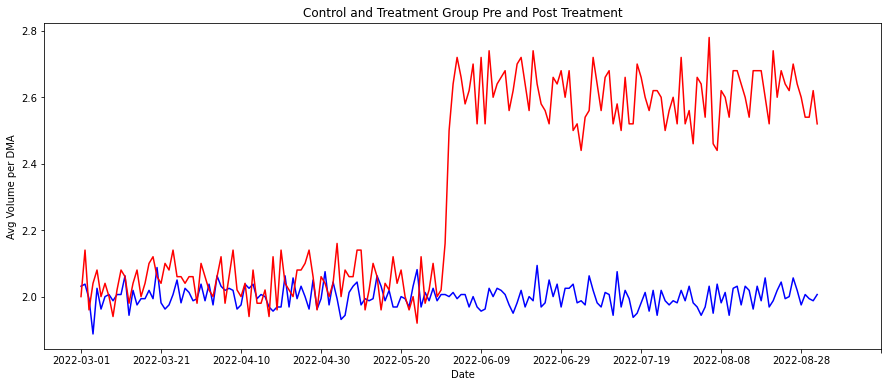

In [22]:
plt.figure(figsize = (15,6))
plt.plot(dfc.volume/160, "blue")
plt.plot(dft.volume/50, "red")
plt.title('Control and Treatment Group Pre and Post Treatment')
plt.xlabel('Date')
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.ylabel('Avg Volume per DMA')
plt.show()

The chart shows clients the effect of the treatment. In this case, it shows the increase of average volume per DMA after the treatment group was conditioned by the ad. 

## Difference-in-difference

In [23]:
result = smf.ols('volume ~ medincome_dma + percent_with_internet_dma + age_dma + percent_hispanic_dma + percent_black_dma + percent_unemployed_dma + percent_inpov_dma + west + midwest + northeast + south + post*treat', df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     453.2
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:                -30801.
No. Observations:               38850   AIC:                         6.163e+04
Df Residuals:                   38836   BIC:                         6.175e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.7616      0.088     31.329      0.000       2.589       2.934
medincome_dma              4.229e-06   4.08e-07     10.363      0.000    3.43e-06    5.03e-06
percent_with_internet_dma    -0.0176      0.001    -16.049      0.000      -0.020      -0.015
age_dma                       0.0088      0.001      7.401      0.000       0.006       0.011
percent_hispanic_dma          0.0014      0.000      5.539      0.000       0.001       0.002
percent_black_dma            -0.0013      0.000     -3.130      0.002      -0.002      -0.000
percent_unemployed_dma       -0.0502      0.007     -7.477      0.000      -0.063      -0.037
percent_inpov_dma            -0.0187      0.004     -5.333      0.000      -0.026      -0.012
west                          0.6750      0.023     29.259      0.000       0.630       0.720
midwest                       0.7457      0.023     32.438      0.000       0.701       0.791
northeast                     0.6974      0.023     30.272      0.000       0.652       0.743
south                         0.6435      0.023     28.550      0.000       0.599       0.688
post                         -0.0053      0.006     -0.859      0.390      -0.018       0.007
treat                         0.0385      0.009      4.246      0.000       0.021       0.056
post:treat                    0.5687      0.013     44.642      0.000       0.544       0.594
==============================================================================
Omnibus:                     1159.666   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2057.748
Skew:                           0.252   Prob(JB):                         0.00
Kurtosis:                       4.009   Cond. No.                     3.76e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The regression is telling us that the interaction term is significant; therefore, the intervention had an effect. The coefficient of the interaction term is 0.5687. This means that the treatment (ad) increases the volume by 56.68%.